In [79]:
from math import sqrt, pi
import numpy as np
import scipy
import matplotlib.pyplot as plt
qfunc = lambda x: 0.5-0.5*scipy.special.erf(x/np.sqrt(2))

In [80]:
def BER_th(mod, EsNo,  M=2):
    if mod == 'BPSK':
        EsNo = 10**(EsNo/10)
        return qfunc(sqrt(2*EsNo))
    elif mod == 'MQAM':
        EsNo = 10**(EsNo/10)
        return 2*(1-1/sqrt(M))*qfunc(sqrt(3*EsNo/(M-1)))
    elif mod == 'MPAM':
        EsNo = 10**(EsNo/10)
        return 2*(1-1/M)*qfunc(sqrt(6*EsNo/(M**2-1)))
    elif mod == 'QPSK':
        EsNo = 10**(EsNo/10)
        return 2*qfunc(sqrt(2*EsNo))
    else:
        print('Select correct modulation scheme')

In [81]:
def add_AWGN(x,nPr):   
    return x + sqrt(nPr)*np.random.randn(len(x))

In [82]:
def BPSK(Es):
    A = sqrt(Es)
    I = np.array([-A, A])
    Q = np.array([0]*2)
    return I, Q

In [83]:
def QPSK(Es):
    M=4
    A=sqrt(Es/2)
    a = sorted([-(2*i+1)*A for i in range(int(sqrt(M)/2))]) + \
        [(2*i+1)*A for i in range(int(sqrt(M)/2))]
    a = np.array(a)
    In,Qn = np.meshgrid(a,a)
    I, Q = In.reshape(1,M)[0], Qn.reshape(1,M)[0]
    return I, Q

In [84]:
def M_PAM(M,Es):
    A=sqrt(3*Es/(M**2-1))
    if M % 2 == 0:
        a = sorted([-(2*i+1)*A for i in range(int(M/2))]) + \
            [(2*i+1)*A for i in range(int(M/2))]
        a = np.array(a)   
        I, Q = a, np.zeros(M)
        return I, Q
    else:
        print('M must be even number, like 2, 4, 6, 8...')
        return 0,0
    

In [85]:
def M_QAM(M,Es):
    A=sqrt((3*Es)/(2*(M-1)))
    try:
        a = sorted([-(2*i+1)*A for i in range(int(sqrt(M)/2))]) + \
            [(2*i+1)*A for i in range(int(sqrt(M)/2))]
        a = np.array(a)
        In,Qn = np.meshgrid(a,a)
        I, Q = In.reshape(1,M)[0], Qn.reshape(1,M)[0]
        return I, Q
    except:
        print('sqrt(M) must be integer for M-QAM, like M = 4,16,64')
        return 0, 0

In [86]:

def M_PSK(M,Es):
    k=np.arange(0,M)
    A = sqrt(Es)
    a = [A*np.cos(2*pi*k/M), A*np.sin(2*pi*k/M)]
    I,Q = a[0], a[1]
    return I, Q


In [87]:
def MPSK_mod(M, Es,N):
    I, Q = M_PSK(M,Es)
    inx = np.random.randint(M, size=N)
    xI, xQ = I[inx], Q[inx]
    return [I,Q], xI, xQ

In [88]:
def BPSK_mod(Es,N):
    M=2
    I, Q = BPSK(Es)
    inx = np.random.randint(M, size=N)
    a = I[:M]
    xI, xQ = I[inx], Q[inx]
    return a, xI, xQ
    

In [89]:
def QPSK_mod(Es,N):
    M=4    
    I, Q = QPSK(Es)
    inx = np.random.randint(M, size=N)
    a = I[:int(sqrt(M))]
    #print(I,Q,a)
    xI, xQ = I[inx], Q[inx]
    return a, xI, xQ
    

In [90]:
def M_QAM_mod(M, Es,N):    
    
    I, Q = M_QAM(M,Es)
    inx = np.random.randint(M, size=N)
    a = I[:int(sqrt(M))]
    
    xI, xQ = I[inx], Q[inx]
    return a, xI, xQ
    

In [91]:
def M_PAM_mod(M, Es,N):
    I, Q = M_PAM(M,Es)
    inx = np.random.randint(M, size=N)
    a = I[:M]
    
    xI, xQ = I[inx], Q[inx]
    return a, xI, xQ

In [92]:
def BPSK_det(y,x,a):
    yI, yQ = y[0], y[1]
    xI, xQ = x[0], x[1]
    dI = []
    for i in range(len(yI)):
        inx = np.argmin(abs(a-yI[i]))
        dI.append(a[inx])
    dff = abs(xI-dI)
    BE = [0]*len(dff)
    for i in range(len(dff)):
        if dff[i] !=0:
            BE[i] = 1
                
    return sum(BE)/len(BE), dI


In [93]:
def MQAM_det(y,x,a):
    yI, yQ = y[0], y[1]
    xI, xQ = x[0], x[1]
    dI = []
    for i in range(len(yI)):
        inx = np.argmin(abs(a-yI[i]))
        dI.append(a[inx])    

    dQ = []
    for i in range(len(yQ)):
        inx = np.argmin(abs(a-yQ[i]))
        dQ.append(a[inx])
    
    d = np.array(dI)+1j*np.array(dQ)
    x = xI + 1j*xQ
    dff = abs(d-x)
    BE = [0]*len(dff)
    for i in range(len(dff)):
        if dff[i] !=0:
            BE[i] = 1
                
    return sum(BE)/len(BE), d

In [94]:
def MPAM_det(y,x,a):
    yI, yQ = y[0], y[1]
    xI, xQ = x[0], x[1]
    dI = []
    for i in range(len(yI)):
        inx = np.argmin(abs(a-yI[i]))
        dI.append(a[inx])
    dff = abs(xI-dI)
    BE = [0]*len(dff)
    for i in range(len(dff)):
        if dff[i] !=0:
            BE[i] = 1
                
    return sum(BE)/len(BE), dI

In [95]:
def nrst_nbr_det(a,x,y):
    yI, yQ = y[0], y[1]
    xI, xQ = x[0], x[1]
    d = []
    I = a[0]
    Q = a[1]
    a = I + 1j*Q
    x = xI + 1j*xQ
    for i in range(len(yI)):
        inx = np.argmin(abs((I-yI[i])**2 + (Q-yQ[i])**2))
        d.append(a[inx])   
    d = np.array(d)
    dff = abs(d-x)
    BE = [1 if dff[i] != 0 else 0 for i in range(len(dff))]
    #print(BE)
    return sum(BE)/len(BE), d

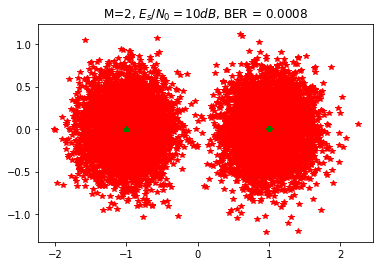

In [97]:
M=2 
Es=1
N=10000
#nPr_dB = 45 #N0/2
EsN0=10#dB
nPr_dB = 10*np.log10(Es) - np.log10(2) - EsN0 
nPr = 10**(nPr_dB/10) 
a, xI, xQ = BPSK_mod(Es,N)
yI, yQ = add_AWGN(xI,nPr), add_AWGN(xQ,nPr)

y = [yI, yQ]
x = [xI, xQ]
BER, d = BPSK_det(y,x,a)
#print(BER_th('BPSK',EsN0))
plt.plot(yI, yQ, '*r')
plt.plot(xI, xQ, '*g')
plt.title('M='+str(M)+', '+ '$E_s/N_0=$'+str(EsN0)+'$dB$, ' +'BER = '+str(BER))
plt.show()

1.0000000000000002


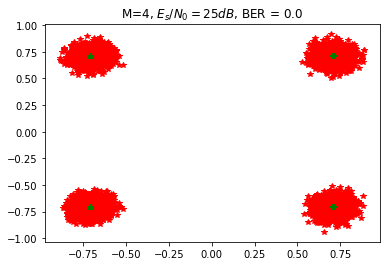

In [98]:
M=4 #M = 4, 16, 64 sqrt(M) must be integer
Es=1

N=10000
#nPr_dB = -25 #N0/2
EsN0=25#dB
nPr_dB = 10*np.log10(Es) - np.log10(2) - EsN0 
nPr = 10**(nPr_dB/10) 
a, xI, xQ = QPSK_mod(Es,N)

yI, yQ = add_AWGN(xI,nPr), add_AWGN(xQ,nPr)

y = [yI, yQ]
x = [xI, xQ]
BER, d = MQAM_det(y,x,a)
print(sum(abs(np.array(d)))/len(d))
plt.plot(yI, yQ, '*r')
plt.plot(xI, xQ, '*g')
plt.title('M='+str(M)+', '+ '$E_s/N_0=$'+str(EsN0)+'$dB$, ' +'BER = '+str(BER))
plt.show()

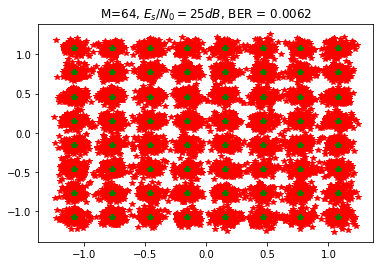

In [99]:
M=64 #M = 4, 16, 64 sqrt(M) must be integer
Es=1

N=10000
#nPr_dB = -25 #N0/2 
EsN0=25#dB

nPr_dB = 10*np.log10(Es) - np.log10(2) - EsN0 


nPr = 10**(nPr_dB/10) 

a, xI, xQ = M_QAM_mod(M, Es,N)


yI, yQ = add_AWGN(xI,nPr), add_AWGN(xQ,nPr)

y = [yI, yQ]
x = [xI, xQ]
BER, d = MQAM_det(y,x,a)
#print(sum(abs(np.array(d)))/len(d))
plt.plot(yI, yQ, '*r')
plt.plot(xI, xQ, '*g')
plt.title('M='+str(M)+', '+ '$E_s/N_0=$'+str(EsN0)+'$dB$, ' +'BER = '+str(BER))
plt.show()

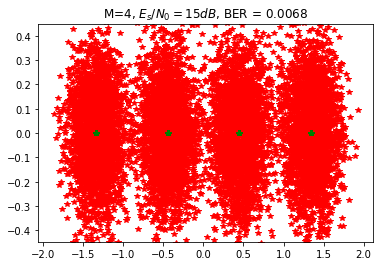

In [100]:
M=4 #M = 2, 4, 6, 8; M must be even number
Es=1
N=10000
#nPr_dB = -17 #N0/2, 
EsN0=15#dB

nPr_dB = 10*np.log10(Es) - np.log10(2) - EsN0 

nPr = 10**(nPr_dB/10) 

a, xI, xQ = M_PAM_mod(M, Es,N)


yI, yQ = add_AWGN(xI,nPr), add_AWGN(xQ,nPr)

y = [yI, yQ]
x = [xI, xQ]

BER, d = MPAM_det(y,x,a)

#print(sum(abs(np.array(d)))/len(d))


plt.plot(yI, yQ, '*r',xI, xQ, '*g')
plt.title('M='+str(M)+', '+ '$E_s/N_0=$'+str(EsN0)+'$dB$, ' +'BER = '+str(BER))
ylm = xI[1]-xQ[0]
plt.ylim(-ylm,ylm)
plt.show()

0.0


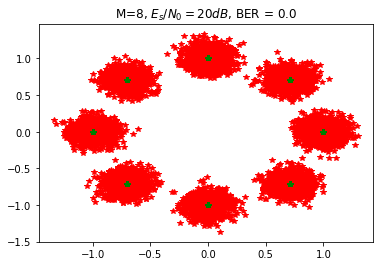

In [101]:
Es=1
M=8
N = 10000

EsN0=20#dB
nPr_dB = 10*np.log10(Es) - np.log10(2) - EsN0 
nPr = 10**(nPr_dB/10) 
a, xI, xQ = MPSK_mod(M, Es,N)
yI, yQ = add_AWGN(xI,nPr), add_AWGN(xQ,nPr)

y = [yI, yQ]
x = [xI, xQ]

BER, d = nrst_nbr_det(a,x,y)
print(BER)
plt.plot(yI, yQ, '*r')
plt.plot(d.real, d.imag, '*g')
plt.title('M='+str(M)+', '+ '$E_s/N_0=$'+str(EsN0)+'$dB$, ' +'BER = '+str(BER))
plt.show()

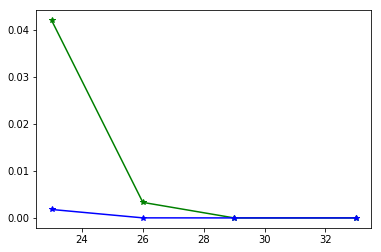

In [502]:
M=64 
Es=1
N=10000
#nPr_dB = 45 #N0/2

EN = [23,26,29,33]
Pe = []
Pe1 = []
for EsN0 in EN:
    nPr_dB = 10*np.log10(Es) - np.log10(2) - EsN0 
    nPr = 10**(nPr_dB/10) 
    a, xI, xQ = M_QAM_mod(M, Es,N)


    yI, yQ = add_AWGN(xI,nPr), add_AWGN(xQ,nPr)

    y = [yI, yQ]
    x = [xI, xQ]
    BER, d = MQAM_det(y,x,a)
    Pe.append(BER)
    
    Pe1.append(BER_th('MQAM', EsN0,  M))

plt.plot(EN, Pe, '-*g',EN, Pe1, '-*b')

plt.show()